<a href="https://colab.research.google.com/github/madelinehooo/IAT360_CV_ASSIGNMENT/blob/main/IAT360_CV_Assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [32]:
import os
import glob
import cv2
import matplotlib.pyplot as plt
import matplotlib.patches as patches
from PIL import Image, ImageDraw

In [ ]:
import pandas as pd

In [ ]:
classes=[
    "0",
    "1",
    "2",
    "3",
    "4",
    "5",
    "6",
    "7",
    "8",
    "9",
    "A",
    "B",
    "C",
    "D",
    "E",
    "F",
    "G",
    "H",
    "I",
    "K",
    "L",
    "M",
    "N",
    "O",
    "P",
    "Q",
    "R",
    "S",
    "T",
    "U",
    "V",
    "X",
    "Y",
    "Z",
    "a",
    "b",
    "c",
    "d",
    "e",
    "f",
    "g",
    "h",
    "i",
    "j",
    "k",
    "l",
    "m",
    "n",
    "o",
    "p",
    "q",
    "r",
    "s",
    "t",
    "u",
    "v",
    "w",
    "x",
    "y",
    "z",
  ]

In [48]:
def decode_word(path: str):
  word=""
  bounding_boxes = {}
  try:
      with open(path, "r", encoding="utf-8") as f:
          lines = f.readlines()
          for i in range(len(lines)):
              lines[i] = lines[i].strip().split(" ")
      # decode word by each letter
      for line in lines:
          letter = classes[int(line[0])]
          bounding_boxes[letter] = line[1:]
          word += letter
      return word, bounding_boxes
  except FileNotFoundError:
      raise
  except Exception as e:
      raise RuntimeError(f"Error reading {path}: {e}") from e

In [49]:
X_TRAIN_PATH = "/content/drive/MyDrive/IAT 360 Computer Vision Project/Doctors prescriptions handwriting.v1i.yolov8/train/images"
Y_TRAIN_PATH = "/content/drive/MyDrive/IAT 360 Computer Vision Project/Doctors prescriptions handwriting.v1i.yolov8/train/labels"
DATA_ROOT ="/content/drive/MyDrive/IAT 360 Computer Vision Project"
IMAGES_PATH = '/content/drive/MyDrive/IAT 360 Computer Vision Project/Doctors prescriptions handwriting.v1i.yolov8/train/*/*.jpg'
LABELS_PATH = '/content/drive/MyDrive/IAT 360 Computer Vision Project/Doctors prescriptions handwriting.v1i.yolov8/train/*/*.txt'


In [50]:

image_list = sorted(glob.glob(IMAGES_PATH))
label_list = sorted(glob.glob(LABELS_PATH))


clean_data = []
data = []
for i in range(len(image_list)):
  image_name=image_list[i].split("/")[-1]
  label_name=label_list[i].split("/")[-1]
  word, bbxs = decode_word(label_list[i])
  data.append({"image": image_name, "label": label_name, "word":word, "bounding_boxes": bbxs})
  clean_data.append({"image": image_name, "label": label_name, "word":word})


df = pd.DataFrame(clean_data)
df.head()

,image,label,word
0,158644895_882858708940191_8856443046584616079_...,158644895_882858708940191_8856443046584616079_...,Xpa
1,158644895_882858708940191_8856443046584616079_...,158644895_882858708940191_8856443046584616079_...,Xpa
2,20230314_201442-3-_jpg.rf.5d18a3a3dbce20aace2d...,20230314_201442-3-_jpg.rf.5d18a3a3dbce20aace2d...,Anuva50
3,20230314_201442-4-_jpg.rf.2bc9c1f860cf8b97e86f...,20230314_201442-4-_jpg.rf.2bc9c1f860cf8b97e86f...,Paricel
4,20230314_201612-2-_jpg.rf.7df74050e9557ed418fe...,20230314_201612-2-_jpg.rf.7df74050e9557ed418fe...,Progut20mg


In [51]:
data[:5]

[{'image': '158644895_882858708940191_8856443046584616079_n-3-_jpg.rf.2ee8d19042032adb47ea4c108383bf3c.jpg',
  'label': '158644895_882858708940191_8856443046584616079_n-3-_jpg.rf.2ee8d19042032adb47ea4c108383bf3c.txt',
  'word': 'Xpa',
  'bounding_boxes': {'X': ['0.40390625',
    '0.68828125',
    '0.1484375',
    '0.42109375'],
   'p': ['0.5453125', '0.6703125', '0.1046875', '0.4125'],
   'a': ['0.65', '0.65625', '0.11953125', '0.4046875']}},
 {'image': '158644895_882858708940191_8856443046584616079_n-3-_jpg.rf.b6c74acaac0ff1919103b0cae8194309.jpg',
  'label': '158644895_882858708940191_8856443046584616079_n-3-_jpg.rf.b6c74acaac0ff1919103b0cae8194309.txt',
  'word': 'Xpa',
  'bounding_boxes': {'X': ['0.40390625',
    '0.68828125',
    '0.1484375',
    '0.42109375'],
   'p': ['0.5453125', '0.6703125', '0.1046875', '0.4125'],
   'a': ['0.65', '0.65625', '0.11953125', '0.4046875']}},
 {'image': '20230314_201442-3-_jpg.rf.5d18a3a3dbce20aace2d8dd6541f5401.jpg',
  'label': '20230314_201442-3

## Visualize an image with bounding boxesfrom IPython.display import display


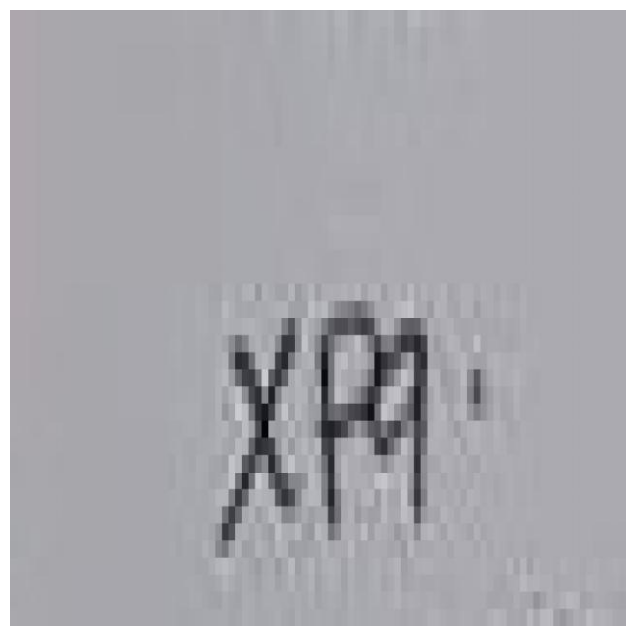

In [78]:
sample_data = data[0]
sample_img_path = os.path.join(X_TRAIN_PATH, sample_data["image"])

# Load the image
img = Image.open(sample_img_path)
fig, ax = plt.subplots(figsize=(8, 8))
ax.imshow(img)

# Get all bounding boxes for this image
boxes = [ (float(sample_data["bounding_boxes"]["X"][i]), float(sample_data["bounding_boxes"]["X"][i+1])) for i in range(0, len(sample_data["bounding_boxes"]["X"]), 2)]
rect = patches.Polygon(boxes)
ax.add_patch(rect)

plt.axis('off')
plt.show()

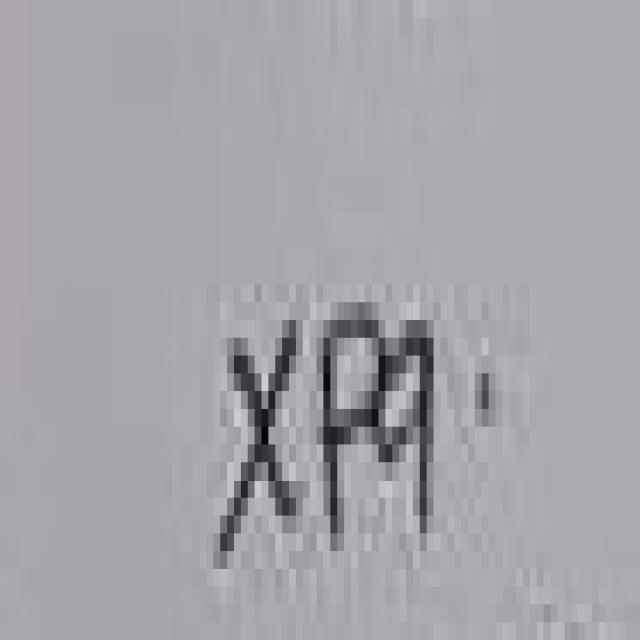

[(0.40390625, 0.68828125), (0.1484375, 0.42109375)] ['0.40390625', '0.68828125', '0.1484375', '0.42109375']


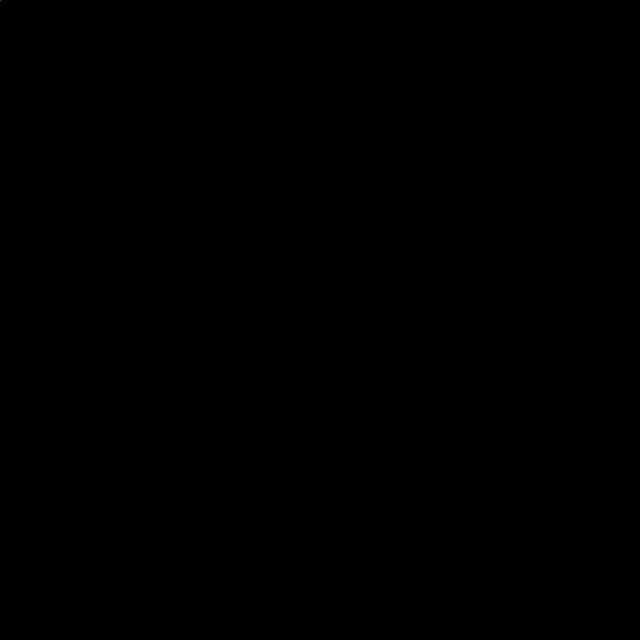

In [77]:
from IPython.display import display

sample_data = data[0]
sample_img_path = os.path.join(X_TRAIN_PATH, sample_data["image"])

img=Image.open(sample_img_path)

# create a draw object this lets us draw the bounding boxes
display(img)

bbxs = sample_data["bounding_boxes"]["X"]
clean_bbxs = []
for i in range(0, len(bbxs), 2):
  clean_bbxs.append((float(bbxs[i]), float(bbxs[i+1])))
print(clean_bbxs, bbxs)

img_filled = Image.new("RGB", (img.width, img.height), None)
draw_filled = ImageDraw.Draw(img_filled)
draw_filled.polygon(clean_bbxs, outline="red", width=4)

display(img_filled)